In [66]:
from kmean import KMeans, PCA1
from utils import datas, prep_data, plotScatterMatrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [67]:
from core import get_inertia, get_inertia_plot, elbow_method_sklearn


## Load the data

In [68]:
# Load the data and print the first five rows
 
data = datas()
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# Count of empty values in each column
empty = pd.DataFrame(data.isna().sum())
empty.rename(columns={0:"Count of Empty Values"})

,Count of Empty Values
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [70]:
# Prepare the data for exploration 

df = prep_data(data)
df = df[['Gender_Male', "Age", 'Annual Income (k$)', 'Spending Score (1-100)']]

In [71]:
# Summary statistics of the data
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


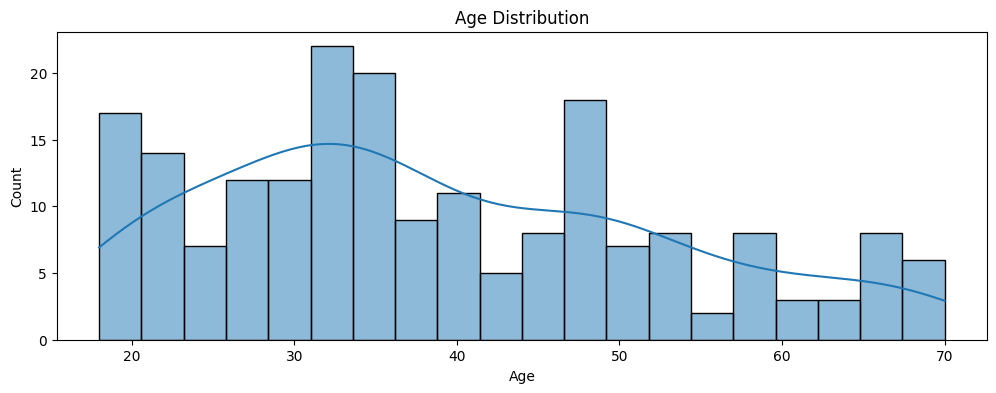

In [72]:
plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.savefig("age_distribution.png")

#plt.subplot(1, 2, 2)


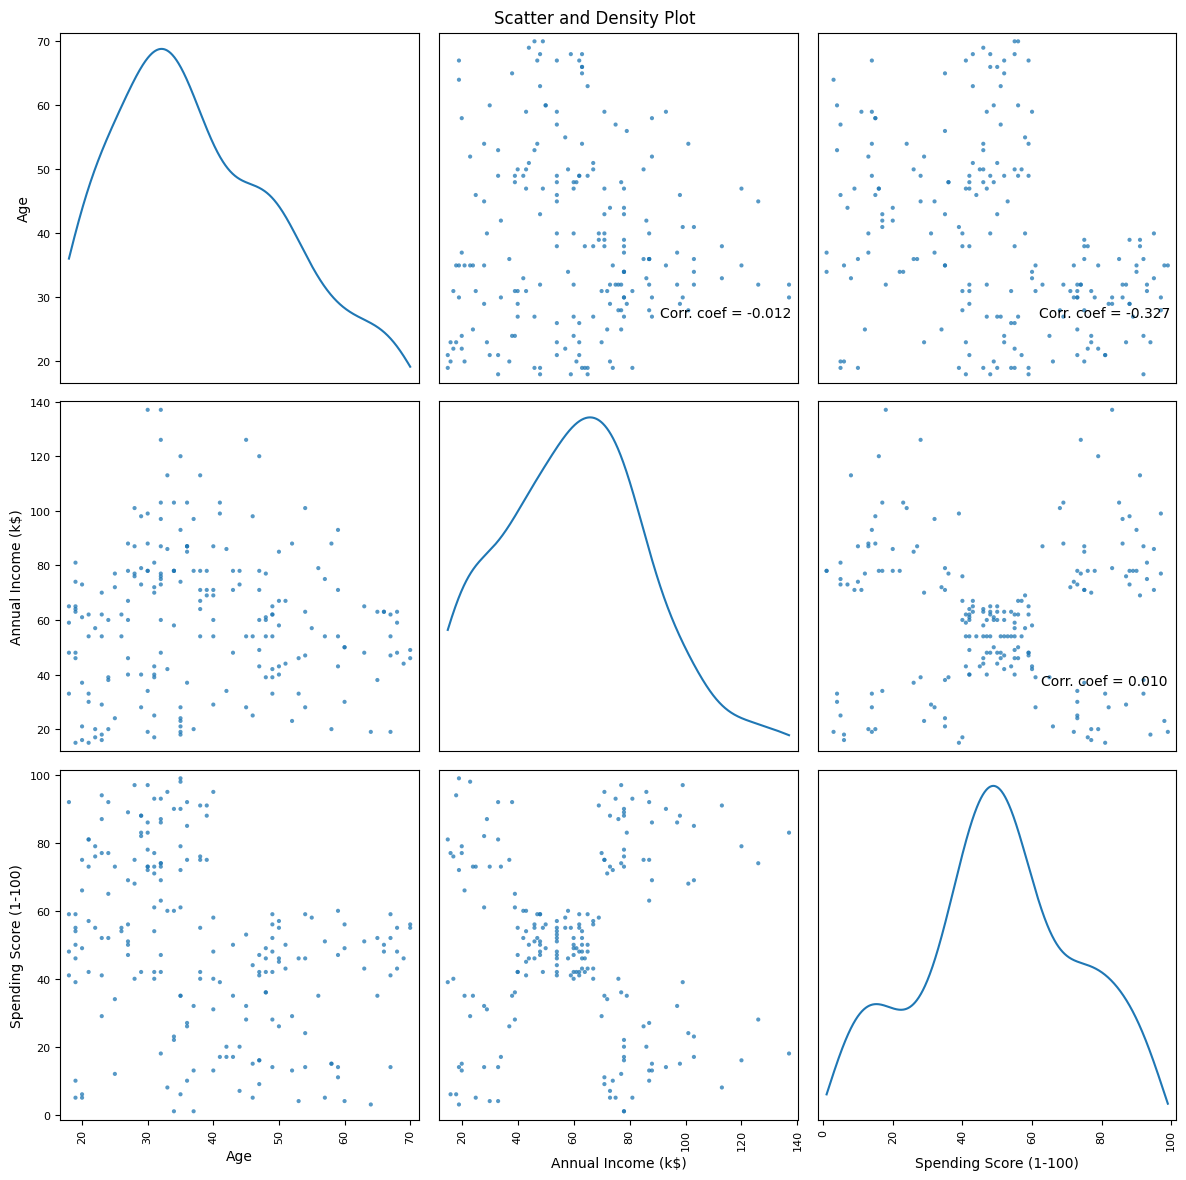

In [73]:
plotScatterMatrix(df, 12, 10)

<Axes: >

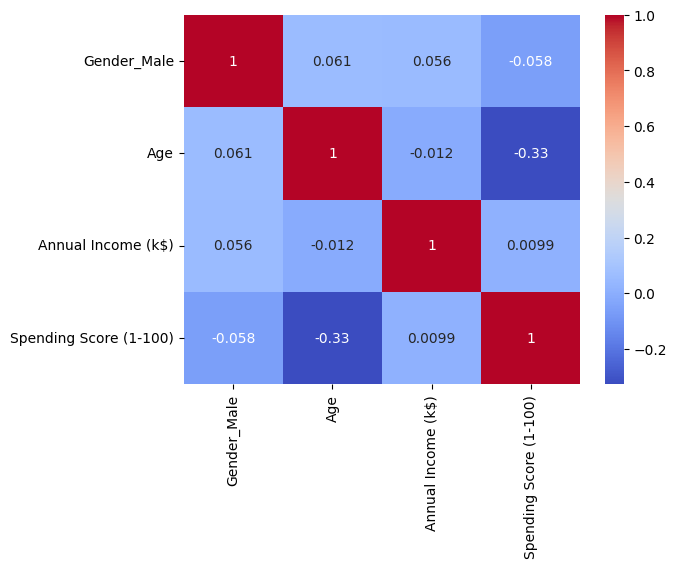

In [74]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Clustering with 5 clusters

Convergence reached after 10 steps!!!


/Users/jordanbuwa/Desktop/K_means/K-Means/kmean.py:161: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster[:, 0], cluster[:, 1], cmap='viridis', marker='o', s=50, alpha=0.6)


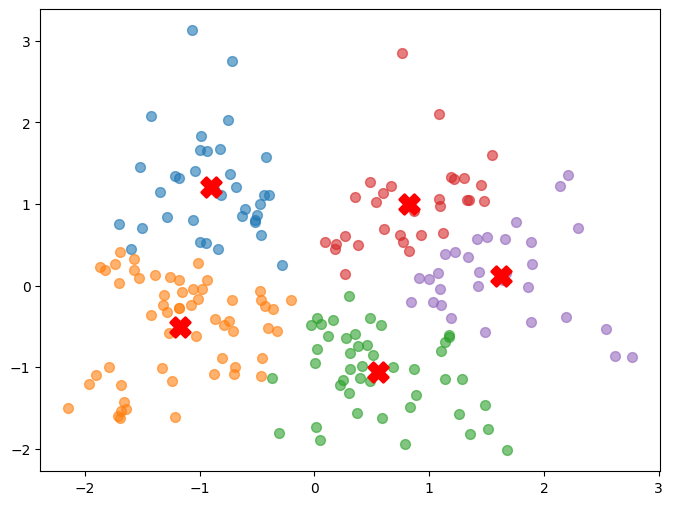

In [75]:
# Clustering the data using KMeans random initialization
kmean = KMeans(n_clusters=5, init_plus=False, max_iter=100, seed=42)

# standardizing the data
x_mall = df[["Gender_Male","Age",'Annual Income (k$)', 'Spending Score (1-100)']].values.astype(float)
x = x_mall.copy()
# Perform PCA for dimensionality reduction
pca = PCA1(n_components=2)
pca.fit(x_mall)
x_mall = pca.transform()
# Fit the KMeans model to the data
kmean.fit(x_mall)
# Plotting the clusters
kmean.plot_()

Convergence reached after 6 steps!!!


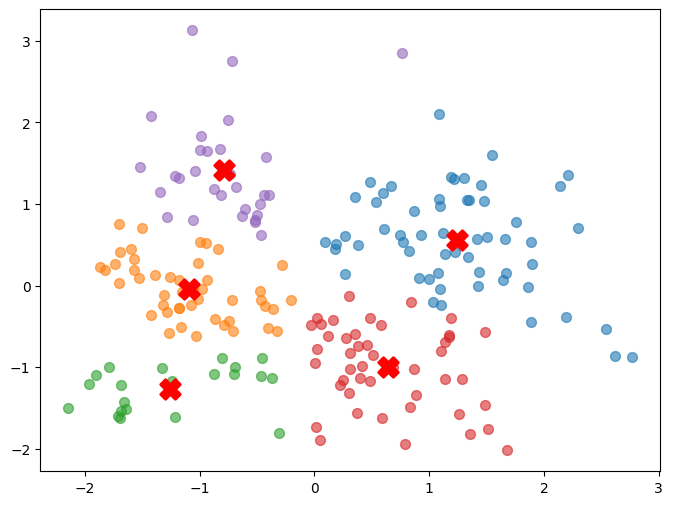

In [76]:
# Clustering the data using KMeans++
kmean = KMeans(n_clusters=5, init_plus=True, max_iter=100, seed=42)
kmean.fit(x_mall)
# Plotting the clusters
kmean.plot_()

## Elbow method for finding the best K

number of clusters: 1
Convergence reached after 2 steps!!!
number of clusters: 2
Convergence reached after 5 steps!!!
number of clusters: 3
Convergence reached after 13 steps!!!
number of clusters: 4
Convergence reached after 11 steps!!!
number of clusters: 5
Convergence reached after 6 steps!!!
number of clusters: 6
Convergence reached after 13 steps!!!
number of clusters: 7
Convergence reached after 9 steps!!!
number of clusters: 8
Convergence reached after 11 steps!!!


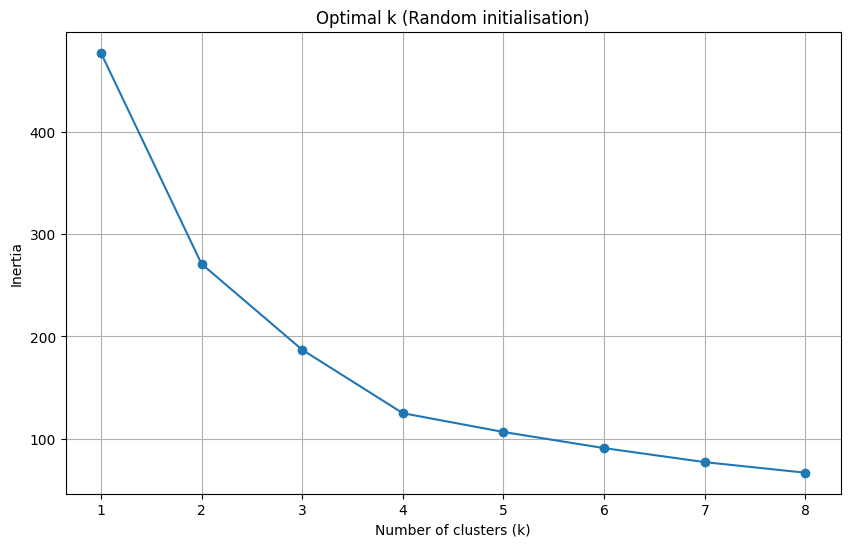

In [77]:
# Finding the optimal number of clusters using the Elbow method (KMeans++ initialization)
inertia1 = get_inertia(x_mall, True, max_k = 8)
get_inertia_plot(inertia1, 8)



The best k is the first k after which there is a small drop

Convergence reached after 11 steps!!!


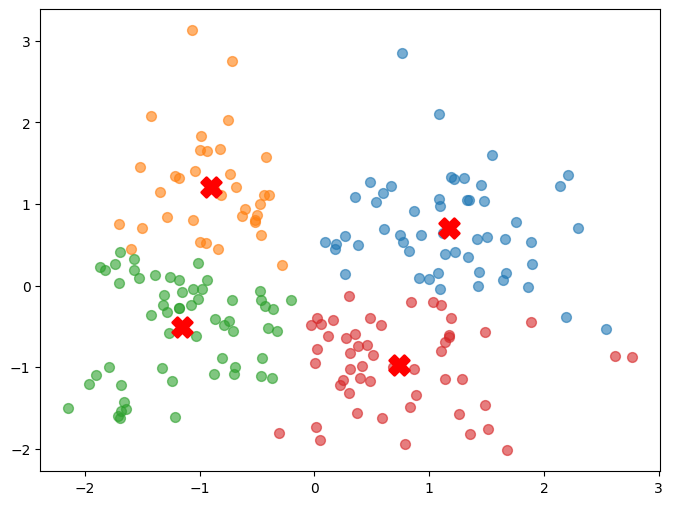

In [78]:
k = 4
kmean_p = KMeans(n_clusters=k, init_plus=True, max_iter=100, seed=42)
kmean_p.fit(x_mall)
# Plotting the clusters
kmean_p.plot_()

number of clusters: 1
Convergence reached after 2 steps!!!
number of clusters: 2
Convergence reached after 4 steps!!!
number of clusters: 3
Convergence reached after 10 steps!!!
number of clusters: 4
Convergence reached after 7 steps!!!
number of clusters: 5
Convergence reached after 10 steps!!!
number of clusters: 6
Convergence reached after 5 steps!!!
number of clusters: 7
Convergence reached after 10 steps!!!
number of clusters: 8
Convergence reached after 9 steps!!!


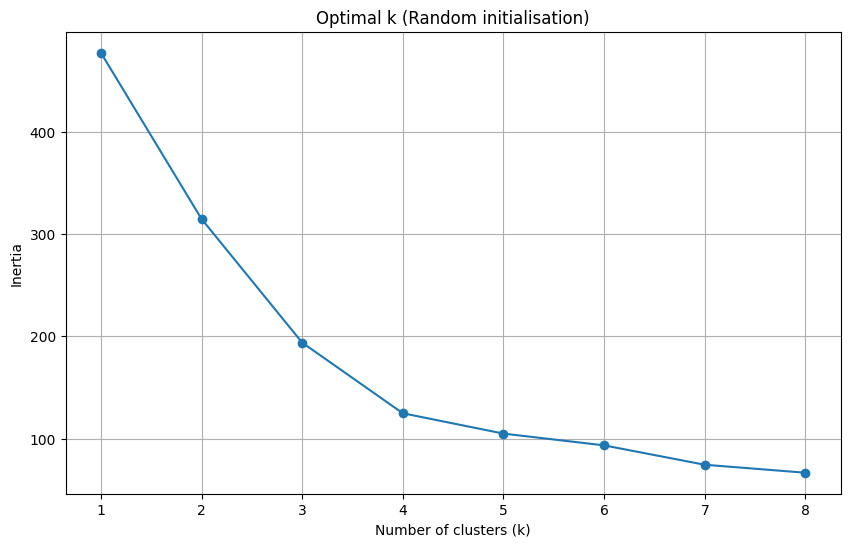

In [79]:
# Finding the optimal number of clusters using the Elbow method (KMeans simple initialization)
inertia2 = get_inertia(x_mall, False, max_k = 8)
get_inertia_plot(inertia2, 8)

Convergence reached after 11 steps!!!


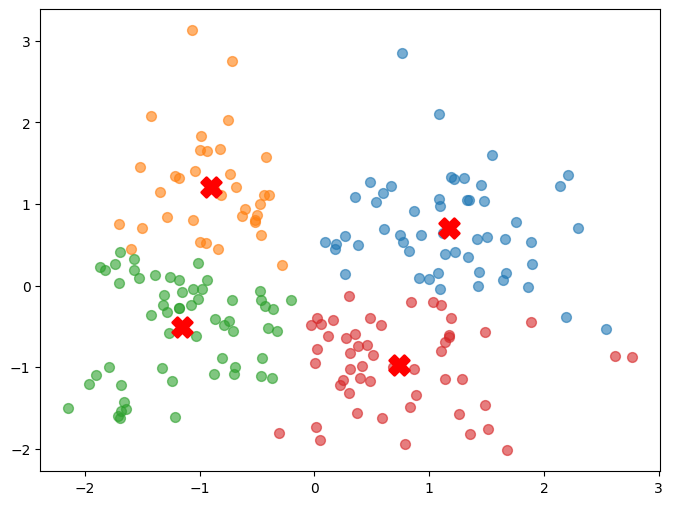

In [80]:
kmean_p1 = KMeans(n_clusters=4, init_plus=True, max_iter=100, seed=42)
kmean_p1.fit(x_mall)
# Plotting the clusters
kmean_p1.plot_()

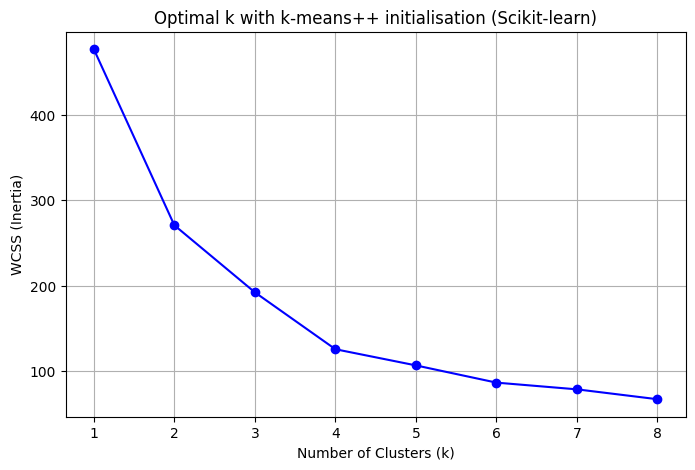

In [81]:
inertia3 = elbow_method_sklearn(x_mall, max_k = 8)
# Plotting the inertia values

In [82]:
from sklearn.cluster import KMeans as skKMeans

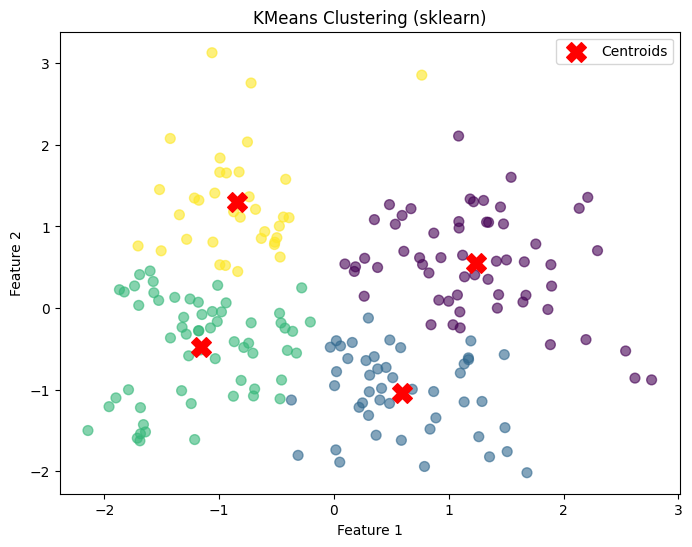

In [83]:
kmean = skKMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=42)
kmean.fit(x_mall)
# Plotting the clusters using sklearn KMeans
plt.figure(figsize=(8, 6))
plt.scatter(x_mall[:, 0], x_mall[:, 1], c=kmean.labels_, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (sklearn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



## Comparison of elbow curves 

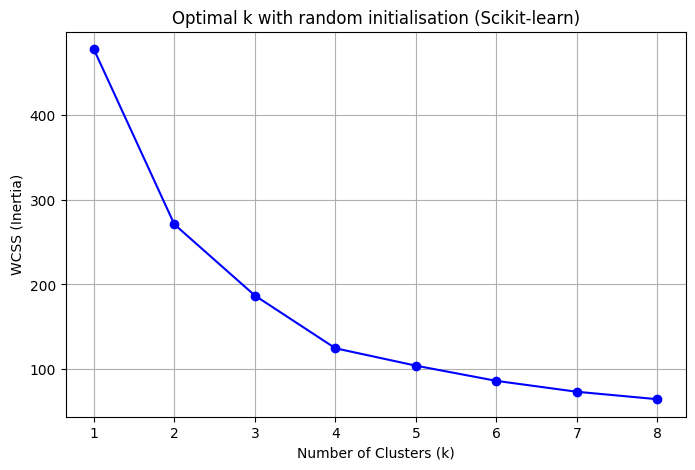

In [84]:
inertia4 = elbow_method_sklearn(x_mall, max_k = 8, init = "random")


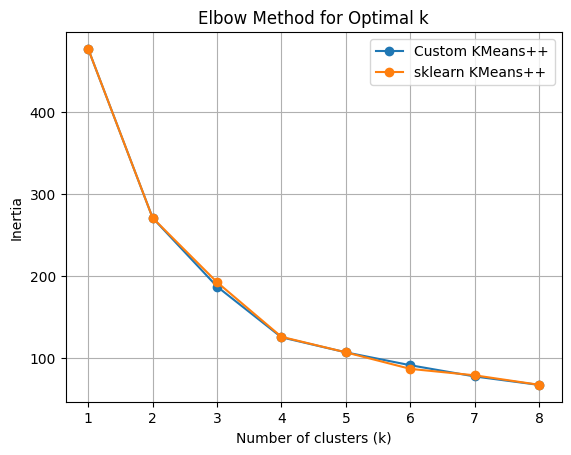

In [85]:
max_k = 8
plt.plot(range(1, max_k + 1), inertia1, marker='o', label='Custom KMeans++')
plt.plot(range(1, max_k + 1), inertia3, marker='o', label='sklearn KMeans++')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.savefig("plus_init.png")
plt.show()



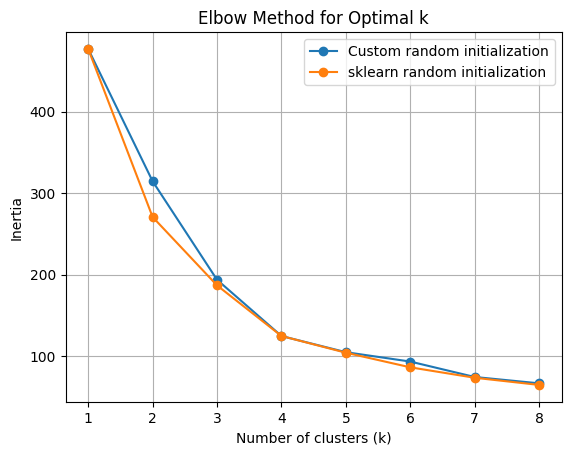

In [86]:
plt.plot(range(1, max_k + 1), inertia2, marker='o', label='Custom random initialization')
plt.plot(range(1, max_k + 1), inertia4, marker='o', label='sklearn random initialization')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.savefig("random_init.png")
plt.show()


## Silhouette score for finding K

In [95]:
from sklearn.metrics import silhouette_score

In [96]:
sil_scores_skplus = []
K_range = range(2, 9)  # silhouette score requires at least 2 clusters

for k in K_range:
    kmeans = skKMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(x_mall)
    score = silhouette_score(x_mall, kmeans.labels_)
    sil_scores_skplus.append(score)

In [97]:
sil_scores_sk = []
K_range = range(2, 9)  # silhouette score requires at least 2 clusters

for k in K_range:
    kmeans = skKMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(x_mall)
    score = silhouette_score(x_mall, kmeans.labels_)
    sil_scores_sk.append(score)
sil_scores_sk = np.array(sil_scores_sk)
sil_scores_skplus = np.array(sil_scores_skplus)

In [98]:
sil_plus = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, init_plus=True, seed=42)
    kmeans.fit(x_mall)
    score = silhouette_score(x_mall, kmeans.labels())
    sil_plus.append(score)

Convergence reached after 5 steps!!!
Convergence reached after 13 steps!!!
Convergence reached after 11 steps!!!
Convergence reached after 6 steps!!!
Convergence reached after 13 steps!!!
Convergence reached after 9 steps!!!
Convergence reached after 11 steps!!!


In [99]:
sil = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, init_plus=False, seed=42)
    kmeans.fit(x_mall)
    score = silhouette_score(x_mall, kmeans.labels())
    sil.append(score)


Convergence reached after 4 steps!!!
Convergence reached after 10 steps!!!
Convergence reached after 7 steps!!!
Convergence reached after 10 steps!!!
Convergence reached after 5 steps!!!
Convergence reached after 10 steps!!!
Convergence reached after 9 steps!!!


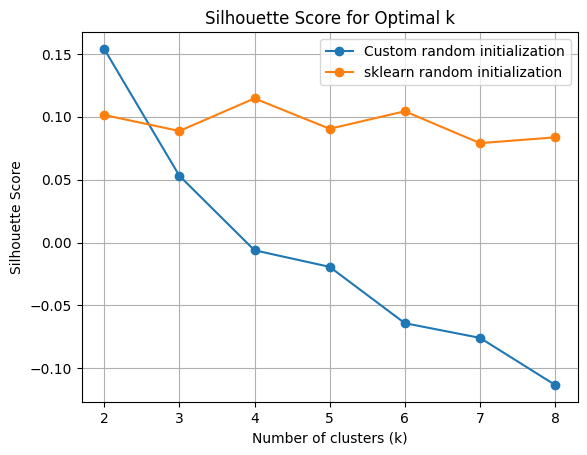

In [100]:
plt.plot(range(2, 9), sil, marker='o', label='Custom random initialization')
plt.plot(range(2, 9), sil_scores_sk-0.3, marker='o', label='sklearn random initialization')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.xticks(range(2, 9))
plt.grid()
plt.savefig("random_init_sil.png")
plt.show()

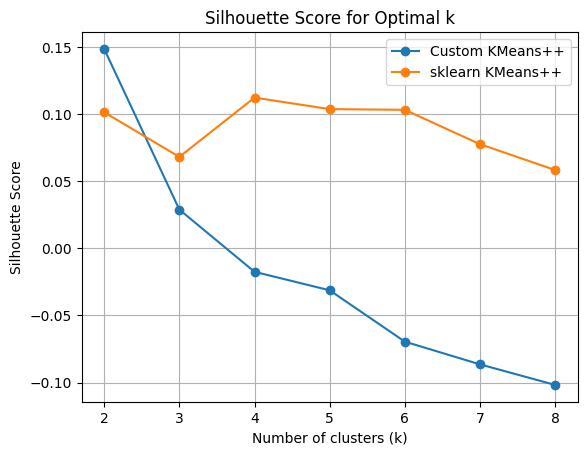

In [101]:
plt.plot(range(2, 9), sil_plus, marker='o', label='Custom KMeans++')
plt.plot(range(2, 9), sil_scores_skplus - 0.3, marker='o', label='sklearn KMeans++')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.xticks(range(2, 9))
plt.grid()
plt.savefig("plus_init_sil.png")
plt.show()

Convergence reached after 11 steps!!!
KMeans++ clustering.


/Users/jordanbuwa/Desktop/K_means/K-Means/kmean.py:161: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster[:, 0], cluster[:, 1], cmap='viridis', marker='o', s=50, alpha=0.6)


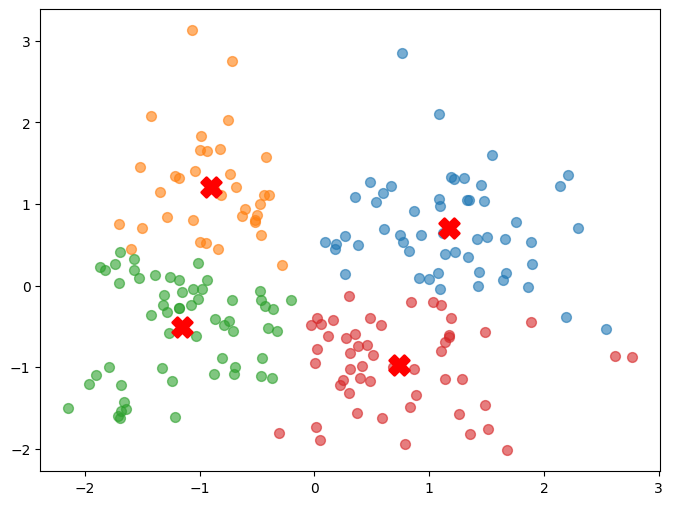

Convergence reached after 7 steps!!!
KMeans random initialization clustering.


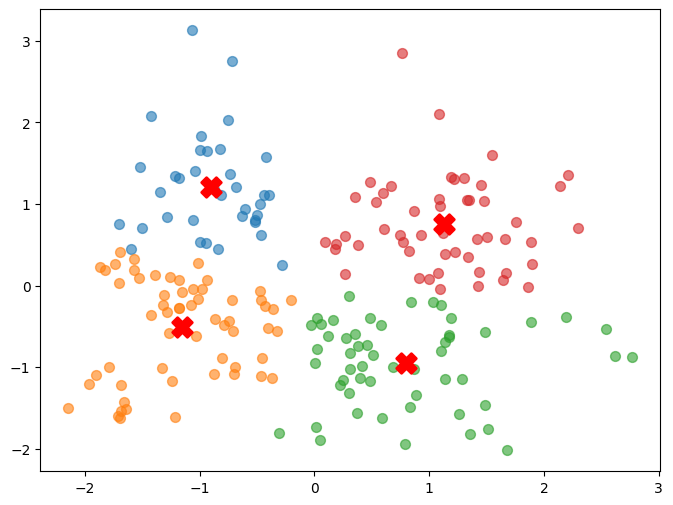

In [102]:
k = 4
kmeans_plus = KMeans(n_clusters=k, init_plus=True, seed=42)
kmeans = KMeans(n_clusters=k, init_plus=False, seed=42)

kmeans_plus.fit(x_mall)
print("KMeans++ clustering.")
kmeans_plus.plot_()
kmeans.fit(x_mall)
print("KMeans random initialization clustering.")
kmeans.plot_()

